In [1]:
import pandas as pd
import numpy
import os

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

In [2]:
goodreads_train = pd.read_csv("goodreads_train.csv") 
goodreads_test = pd.read_csv("goodreads_test.csv")

In [3]:
goodreads_train.shape

(900000, 11)

In [4]:
goodreads_test.shape

(478033, 10)

In [5]:
goodreads_train.head(10)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
5,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,5
6,8842281e1d1347389f2ab93d60773d4d,22318578,5fe9882bfe4b0520a322820c4c55747d,5,5 stars for giving me a better framework for h...,Sun Jun 07 12:50:13 -0700 2015,Wed Mar 22 11:36:58 -0700 2017,Sun Aug 09 00:00:00 -0700 2015,Sun Jun 07 00:00:00 -0700 2015,24,3
7,8842281e1d1347389f2ab93d60773d4d,24189224,dbc01e2438df7a87ee3dc16ee23a53e5,0,Numerous people in publishing have told me thi...,Fri May 29 17:48:57 -0700 2015,Fri May 29 17:49:40 -0700 2015,NaN,NaN,11,5
8,8842281e1d1347389f2ab93d60773d4d,22551730,754710070f38e1c59a45f6a85473b836,4,Another hard to put down nonfiction book from ...,Thu May 07 13:59:32 -0700 2015,Wed Dec 14 12:30:43 -0800 2016,Sat Jul 11 00:00:00 -0700 2015,Wed Jun 24 00:00:00 -0700 2015,20,6
9,8842281e1d1347389f2ab93d60773d4d,22816087,d11954e6e9e9ddf52aed41d83ce43fa6,5,I love Stephenson - and this was another hit -...,Wed Apr 29 10:56:44 -0700 2015,Wed Dec 14 12:30:43 -0800 2016,Wed Nov 04 00:00:00 -0800 2015,Sun Sep 27 00:00:00 -0700 2015,40,6


In [6]:
goodreads_train.set_index('review_id', inplace=True)
goodreads_test.set_index('review_id', inplace=True)

In [7]:
books = pd.concat([goodreads_train.drop('rating', axis=1), goodreads_test], axis=0)
books_rates = goodreads_train['rating']

books.shape

(1378033, 9)

In [8]:
books.head(10)

,user_id,book_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
review_id,,,,,,,,,
dfdbb7b0eb5a7e4c26d59a937e2e5feb,8842281e1d1347389f2ab93d60773d4d,18245960,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
a5d2c3628987712d0e05c4f90798eb67,8842281e1d1347389f2ab93d60773d4d,16981,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
ced5675e55cd9d38a524743f5c40996e,8842281e1d1347389f2ab93d60773d4d,27161156,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
332732725863131279a8e345b63ac33e,8842281e1d1347389f2ab93d60773d4d,25884323,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
ea4a220b10e6b5c796dae0e3b970aff1,8842281e1d1347389f2ab93d60773d4d,19398490,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,5
5fe9882bfe4b0520a322820c4c55747d,8842281e1d1347389f2ab93d60773d4d,22318578,5 stars for giving me a better framework for h...,Sun Jun 07 12:50:13 -0700 2015,Wed Mar 22 11:36:58 -0700 2017,Sun Aug 09 00:00:00 -0700 2015,Sun Jun 07 00:00:00 -0700 2015,24,3
dbc01e2438df7a87ee3dc16ee23a53e5,8842281e1d1347389f2ab93d60773d4d,24189224,Numerous people in publishing have told me thi...,Fri May 29 17:48:57 -0700 2015,Fri May 29 17:49:40 -0700 2015,NaN,NaN,11,5
754710070f38e1c59a45f6a85473b836,8842281e1d1347389f2ab93d60773d4d,22551730,Another hard to put down nonfiction book from ...,Thu May 07 13:59:32 -0700 2015,Wed Dec 14 12:30:43 -0800 2016,Sat Jul 11 00:00:00 -0700 2015,Wed Jun 24 00:00:00 -0700 2015,20,6


In [9]:
books.drop(columns=['date_updated', 'read_at', 'started_at'], axis=1, inplace=True)

In [10]:
books_1 = books[(books['n_votes'] >=0) & (books['n_comments']>=0)]

In [11]:
books_1

,user_id,book_id,review_text,date_added,n_votes,n_comments
review_id,,,,,,
dfdbb7b0eb5a7e4c26d59a937e2e5feb,8842281e1d1347389f2ab93d60773d4d,18245960,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,28,1
a5d2c3628987712d0e05c4f90798eb67,8842281e1d1347389f2ab93d60773d4d,16981,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,1,0
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,22,0
ced5675e55cd9d38a524743f5c40996e,8842281e1d1347389f2ab93d60773d4d,27161156,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,5,1
332732725863131279a8e345b63ac33e,8842281e1d1347389f2ab93d60773d4d,25884323,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,9,1
...,...,...,...,...,...,...
0e1db3d4b04256f9660f5d276ddf1314,35cef391b171b4fca45771e508028212,15745950,Can't wait for Travis' POV \n Travis Before Ab...,Sun Aug 05 10:26:12 -0700 2012,0,0
0b7f352e58caf0fd1f961e98ef04e89c,35cef391b171b4fca45771e508028212,10861195,Had this on my to-read shelf forever. Will upd...,Tue Jul 10 23:31:00 -0700 2012,0,0
9b19eff33ddb14e9e68fca2e90379e46,35cef391b171b4fca45771e508028212,6131164,The last book left me wanting for more. I need...,Tue Jul 10 19:45:17 -0700 2012,0,0


In [12]:
sum(books_1.duplicated())

0

In [13]:
sum(books_1.duplicated(subset=['review_text']))

16130

In [14]:
books_1.drop_duplicates(subset=['review_text'], inplace=True)

In [15]:
books_1.head(10)

,user_id,book_id,review_text,date_added,n_votes,n_comments
review_id,,,,,,
dfdbb7b0eb5a7e4c26d59a937e2e5feb,8842281e1d1347389f2ab93d60773d4d,18245960,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,28,1
a5d2c3628987712d0e05c4f90798eb67,8842281e1d1347389f2ab93d60773d4d,16981,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,1,0
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,22,0
ced5675e55cd9d38a524743f5c40996e,8842281e1d1347389f2ab93d60773d4d,27161156,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,5,1
332732725863131279a8e345b63ac33e,8842281e1d1347389f2ab93d60773d4d,25884323,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,9,1
ea4a220b10e6b5c796dae0e3b970aff1,8842281e1d1347389f2ab93d60773d4d,19398490,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,35,5
5fe9882bfe4b0520a322820c4c55747d,8842281e1d1347389f2ab93d60773d4d,22318578,5 stars for giving me a better framework for h...,Sun Jun 07 12:50:13 -0700 2015,24,3
dbc01e2438df7a87ee3dc16ee23a53e5,8842281e1d1347389f2ab93d60773d4d,24189224,Numerous people in publishing have told me thi...,Fri May 29 17:48:57 -0700 2015,11,5
754710070f38e1c59a45f6a85473b836,8842281e1d1347389f2ab93d60773d4d,22551730,Another hard to put down nonfiction book from ...,Thu May 07 13:59:32 -0700 2015,20,6


In [16]:
unapp_text = books_1['review_text'].apply(lambda txt: numpy.mean(list(map(len, txt.split()))))>25

In [17]:
books_1[unapp_text].head(10)

,user_id,book_id,review_text,date_added,n_votes,n_comments
review_id,,,,,,
ba7e149d70cb858d87d4113dfe0e4091,8092e33e9c50d3e269a8164177d2abdc,6339664,IhavetoadmitihavefalleninlovewithPatcicannotwa...,Sun Sep 30 12:29:48 -0700 2012,1,1
90529a603506931b91502b3c65b0564c,308c545182f8b5d332ff71c667fd9b61,12127810,the feels for NICO DI ANGELO.....................,Thu May 16 23:11:00 -0700 2013,0,0
7105506d7aa373be892e6d7d29750741,302eb3debfc02e0bdd0fd617d34a2713,10644930,"""The past is obdurate."" \n rtcrtcrtcrtcrtcrtcr...",Fri Mar 18 07:59:13 -0700 2016,0,0
ba4e577524730630bef88cb4c76c6dd7,de107a99cb0ed2ec5d90d744cc48c310,23723788,2.5 it's-a-good-book-as-in-even-after-months-I...,Sun Aug 30 18:18:44 -0700 2015,0,0
d9d104943954cc9d975a07d1a724be90,de107a99cb0ed2ec5d90d744cc48c310,23496782,2.5 It-Was-a-Very-Okay-Book-With-the-Mystery-a...,Thu Apr 09 04:41:42 -0700 2015,3,0
a79de0fe1d6b8cb32722276577a2a870,ba0a0f32ee81d2bc56866f4ab767062c,7664041,Must...fry...more...brain...cells!,Mon Nov 14 14:58:55 -0800 2011,0,0
ebb2dc04593320cf2e6af799a0f98e63,1ffb13e4f8c151bb07c8d8eb869c2d7e,18630598,#certaincharactersthatiwontdisclosedeservedbet...,Sun Jul 09 16:46:56 -0700 2017,0,0
59fa84dcdaa951b79ef0bb4bcda2d19d,f65170af6d65deb8d2c3dbfc0fe79939,13562356,Aw.That.Was.Nice.And.Too.Short.,Tue Mar 11 10:37:14 -0700 2014,1,0
4955188c74fbc2f4da1cbf4a1bb452e1,27325d8a3c87ccb35bc603e158c35dd3,25558608,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,Thu Feb 11 12:36:49 -0800 2016,1,0


In [20]:
books_1.drop(books_1[unapp_text].index, axis=0, inplace=True)

In [21]:
spoil_statement = 'spoiler alert'
books_1['spoil'] = [True if spoil_statement in txt else False for txt in books_1['review_text']]

In [22]:
books_1[books_1['spoil'] == True]

,user_id,book_id,review_text,date_added,n_votes,n_comments,spoil
review_id,,,,,,,
e23965adda7ce7e7e415a1339e169065,8842281e1d1347389f2ab93d60773d4d,62291,** spoiler alert ** \n Loved it. The epic saga...,Tue Jul 12 12:57:07 -0700 2011,5,1,True
0258b3c9a85cecb95f240e43a7642f60,8842281e1d1347389f2ab93d60773d4d,7112495,** spoiler alert ** \n An interesting book in ...,Thu Jun 10 14:41:13 -0700 2010,7,3,True
d44b6d28f456dbcc5b1537b4c5572400,8842281e1d1347389f2ab93d60773d4d,6411961,"** spoiler alert ** \n Critics aside, Dan Brow...",Wed Sep 16 11:09:03 -0700 2009,3,3,True
d49eb786ef1d8557b9e6e86bcafd4570,8842281e1d1347389f2ab93d60773d4d,77432,"** spoiler alert ** \n I equally loved book 2,...",Tue May 05 18:08:22 -0700 2009,1,0,True
b8e08587ce1592d69548d0f644cb9893,8842281e1d1347389f2ab93d60773d4d,14497,** spoiler alert ** \n Just finished this and ...,Thu Mar 27 17:53:06 -0700 2008,6,1,True
...,...,...,...,...,...,...,...
a989c818917a7463089454b356fb6671,5ff0927d425ab1a70d2b2d41fe6b96b5,13239950,** spoiler alert ** \n Hills like White Elepha...,Wed Oct 31 18:22:50 -0700 2012,25,7,True
3736d5ee5904b4b5651912dd28b7ce01,a16fd6b48c6e877042acbe2bda8a0007,115076,** spoiler alert ** \n I was completely engros...,Mon Jun 04 07:18:34 -0700 2012,0,0,True
a7777a1c18ab582586a61ad453d91949,692ce8eb4d5490980f6e74f6cb8671e2,12974372,** spoiler alert ** \n Hmm...what to say about...,Wed Nov 04 12:33:22 -0800 2015,1,0,True


## preprocessing

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [26]:
#nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ckdrb\AppData\Roaming\nltk_data...


True

In [27]:
import string
exclist = string.punctuation + string.digits
lamitizer = WordNetLemmatizer()
stopwords_list = stopwords.words('english')

def preprocessing_text(txt):
    words = txt.translate(str.maketrans(exclist, ' '*len(exclist))).lower().split()
    return (' '.join([lamitizer.lemmatize(word) for word in words if word not in stopwords_list])).strip()

books_1['review_text_tokens'] = books_1['review_text'].progress_apply(preprocessing_text)

books_1['review_text_tokens'].sample(5)

100%|██████████████████████████████████████████████████████████████████████| 1361774/1361774 [12:40<00:00, 1789.87it/s]


review_id
29fa19cefada517bc95e8cce9ae6c26a    review posted guilty pleasure star scrap metal...
1546a15827f1c4a74c4653daf749ee65    strange novel alternating violet amber point v...
eb4de8ce22b03849f4985445ef7b0908    town grimbaud love fortune real people line st...
01ba622de7e808c5c240803ce1fe32aa    enjoyed think need happen sure ton development...
9c7bb8a0c7632d931420bdd0ea83c05e       see review http www youtube com watch v mfinrc
Name: review_text_tokens, dtype: object

In [28]:
books_1.sample(5)

,user_id,book_id,review_text,date_added,n_votes,n_comments,spoil,review_text_tokens
review_id,,,,,,,,
6ffb385928d33fc3ff3d14df260e742b,52a70db54c959e7164784cabc6c077da,7624,'A classic you must read' I was told. I liked ...,Sat Nov 09 11:12:25 -0800 2013,0,0,False,classic must read told liked story okay comple...
44fab398ff9120904e579779266826b6,6d3fdda881efbc582d1a48040ca1cf14,462033,Maisie Dobbs is setting up shop as a private i...,Thu Aug 20 14:25:34 -0700 2015,0,0,False,maisie dobbs setting shop private investigator...
e90d3512e17ad827053d429a8478b847,dcffeab5847efb63244722253495da06,8490112,I LOVE IT SO MUCH,Mon May 23 07:46:17 -0700 2016,14,55,False,love much
fb56748fd17a316bd5b7483faebc3efd,ff98cd14325115894095db0631bc6a0d,20419003,Quest Reviews \n This is a snappy little myste...,Wed Aug 27 06:10:44 -0700 2014,0,0,False,quest review snappy little mystery romantic pa...
9dde6d1c3b8da9b6711f071f99182ec5,c345e85972f63c7f59ba58a308b01b4b,25460957,"The plot, I like the star, because I like the ...",Tue Aug 11 12:39:43 -0700 2015,1,0,False,plot like star like thousand one night liked s...


In [30]:
datetime_format = '%a %b %d %H:%M:%S %z %Y'
books_1['date_added'] = pd.to_datetime(books['date_added'], format=datetime_format, utc = True)
books_1.sample(5)

,user_id,book_id,review_text,date_added,n_votes,n_comments,spoil,review_text_tokens
review_id,,,,,,,,
79138f35d76c1cfbed4237cdd9d22bf4,4c92c78aa03db649a2623384ccfbd20e,6584188,*WILL CONTAIN SPOILERS IF YOU HAVEN'T YET READ...,2012-08-25 10:57:02+00:00,0,0,False,contain spoiler yet read first book wow actual...
f99d0879b2d83a88efb38269d37ee583,d600d0914c19c8048abcd9a844765df1,68527,If only the first 200 pages were like the last...,2008-10-20 07:59:10+00:00,1,0,False,first page like last really enjoy last page la...
e6fb81ac0cbbb3e07132fdb87e5431f9,74b654d4400cdc67318b6889aaf6e2f9,10915,Salem Falls is easily one of my favorite Jodi ...,2009-03-25 00:33:28+00:00,9,1,False,salem fall easily one favorite jodi picoult bo...
2bee455e970483965f35ccbec885fe52,f30a6ede96a04305af67e6443da04ad8,736301,Quite possible one of the best books I've ever...,2012-11-08 14:16:35+00:00,2,0,False,quite possible one best book ever read need sp...
d6aaec6eeafd27916c4c4b7ce85a8a1d,480b6a5bec1a4e2f16805a240482c023,10814946,OH MY GOD THIS BOOK I ONLY READ IT IN JUST ONE...,2013-07-21 00:09:39+00:00,0,0,False,oh god book read one day night couldnt put ser...


<AxesSubplot:title={'center':'10 Date with most reviews'}, xlabel='dates', ylabel='count'>

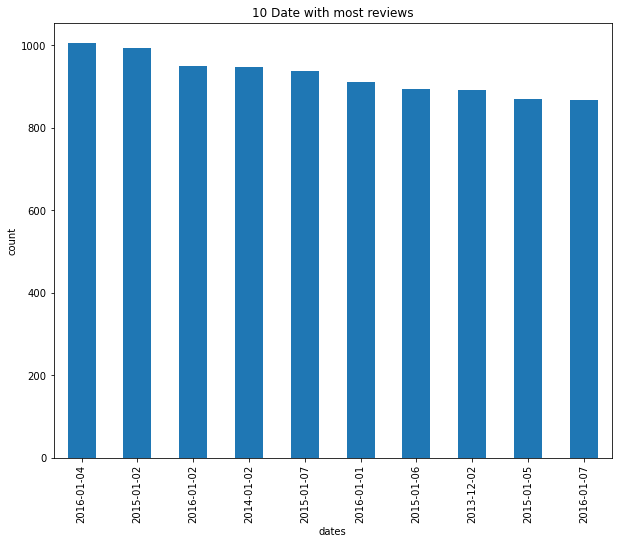

In [32]:
books_dates_added = books_1['date_added'].dt.date
books_dates_added.value_counts()[:10].plot(kind = 'bar',
                                             figsize=(10,8),
                                             title='10 Date with most reviews',
                                             xlabel='dates',
                                             ylabel='count')

<AxesSubplot:title={'center':'Number of rating action in months of all years'}, xlabel='Month of week', ylabel='Count'>

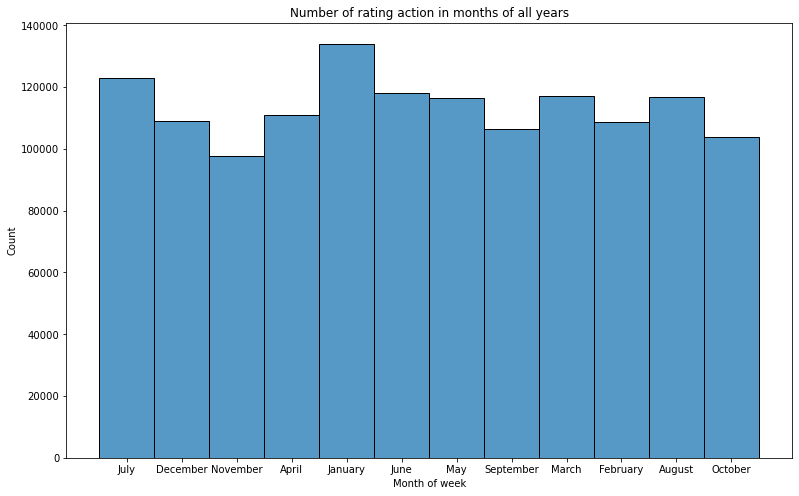

In [36]:
plt.figure(figsize=(10, 8))
plt.title("Number of rating action in days of all weeks")
plt.xlabel("Day of week")
plt.ylabel("Count")
sns.histplot(books_1['date_added'].dt.day_name())

<AxesSubplot:title={'center':'Number of rating action in months of all years'}, xlabel='Month of week', ylabel='Count'>

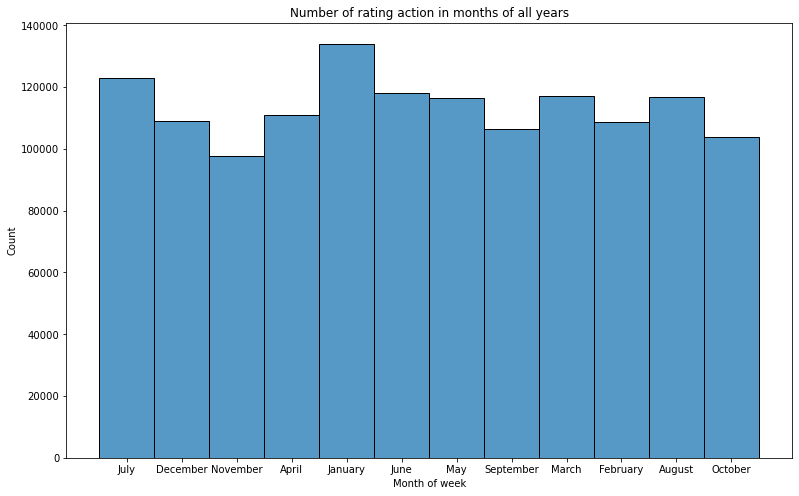

In [38]:
plt.figure(figsize=(13, 8))
plt.title("Number of rating action in months of all years")
plt.xlabel("Month of week")
plt.ylabel("Count")
sns.histplot(books_1['date_added'].dt.month_name())

<AxesSubplot:title={'center':'10 books with the most reviews'}, xlabel='book id', ylabel='number of reviews'>

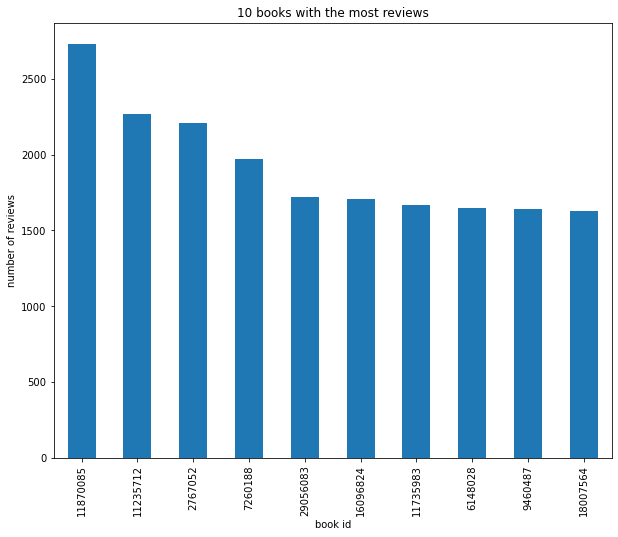

In [39]:
books_1.groupby('book_id').count().sort_values(by='user_id', ascending=False)['user_id'][:10].plot(kind='bar', figsize=(10,8),title='10 books with the most reviews', xlabel='book id', ylabel='number of reviews')

<AxesSubplot:title={'center':'10 users with the most reviews'}, xlabel='User id', ylabel='Number of reviews'>

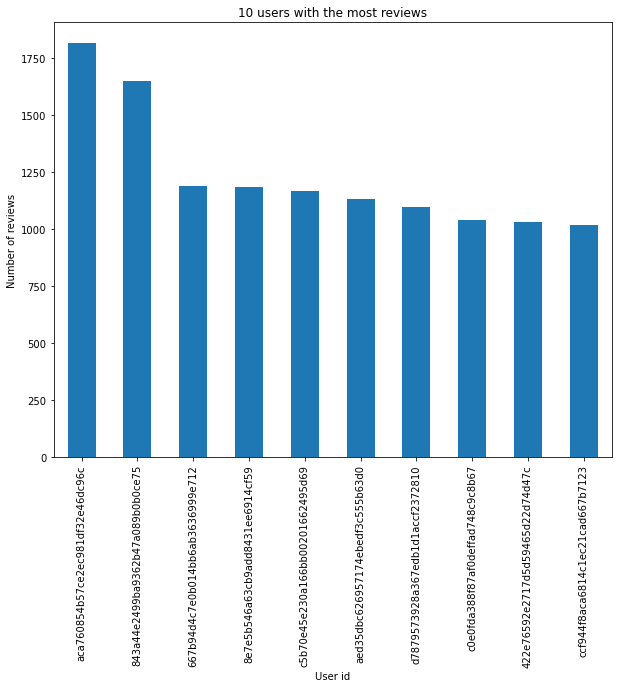

In [40]:
books_1.groupby('user_id').count().sort_values(by='book_id', ascending=False)['book_id'][:10].plot(kind='bar',figsize=(10, 8),title='10 users with the most reviews',xlabel='User id',ylabel='Number of reviews')

<AxesSubplot:title={'center':'Number of Spoilers Vs. NO Spoilers'}, xlabel='Tags', ylabel='Count'>

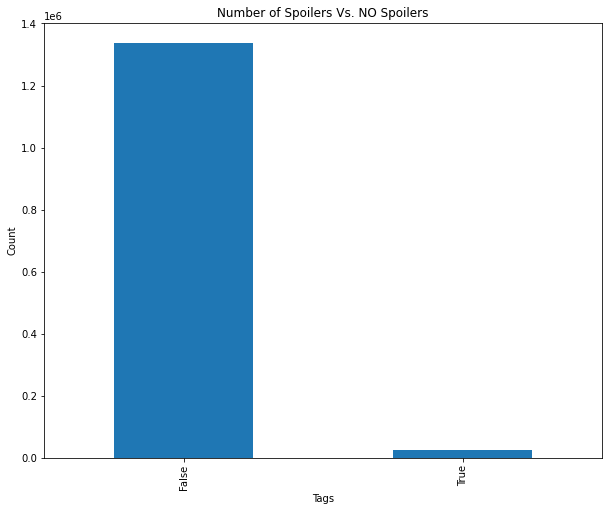

In [41]:
books_1['spoil'].value_counts().plot(kind='bar',figsize=(10, 8),title='Number of Spoilers Vs. NO Spoilers',xlabel='Tags',ylabel='Count')

In [42]:
books_rates.sample(5)

review_id
7f940a87528a74d0cda71c1a1adf66d7    3
633e896872a75a7eedee88048990779d    5
a4d753ac6eb7cb12a702180ed4f20dcf    4
9fc26fb8797500b09412bc8317caad50    3
909464453e166016c6fb7fc512de64d1    4
Name: rating, dtype: int64

In [44]:
clean_books_rate = books_1.merge(books_rates, how='inner', on='review_id')
clean_books_rate.sample(3)

,user_id,book_id,review_text,date_added,n_votes,n_comments,spoil,review_text_tokens,rating
review_id,,,,,,,,,
25ae7ecaf578fb050bc51939ff99ed99,8b4598ce3fb568275e109576d0b1be9b,26109391,Easily one of the best books I've read for 2016!,2016-04-23 00:07:29+00:00,1,0,False,easily one best book read,5
1401714686a6de5c035dff3bd0e71159,1fc58f53eb67bcf6c78af62087697449,21457243,This series is so good and gets better with ev...,2014-04-08 23:06:51+00:00,0,0,False,series good get better every book book tension...,5
6ad4860ae762899254a3455d8c0e7cc1,e9decb6ba786ca17bf66a7cfb94bac22,26116496,Find this review and more at Ramblings From Th...,2016-01-21 18:06:13+00:00,0,0,False,find review ramblings chick last time u first ...,2


<AxesSubplot:title={'center':'The Number of each rate'}, xlabel='Rate', ylabel='Count'>

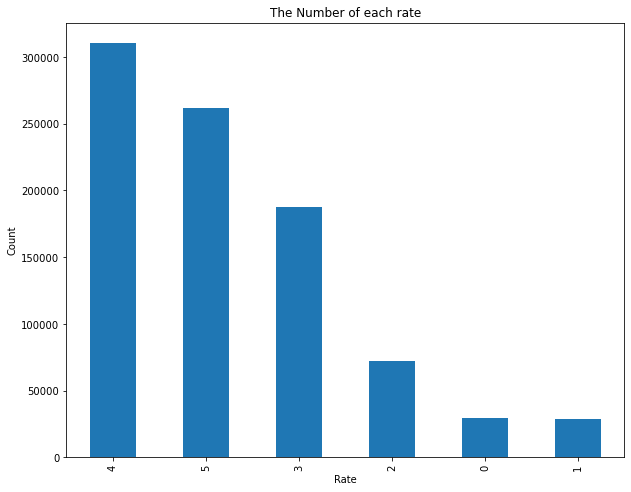

In [45]:
clean_books_rate['rating'].value_counts().plot(kind='bar', figsize=(10, 8),title='The Number of each rate',xlabel='Rate',ylabel='Count')

<AxesSubplot:title={'center':'The Mean of rateing per book'}, ylabel='Frequency'>

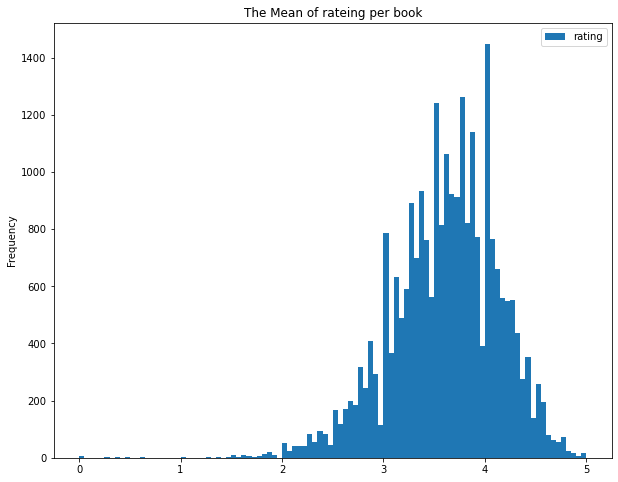

In [46]:
clean_books_rate.groupby(by='book_id').mean()['rating'].plot(kind='hist',figsize=(10, 8),title='The Mean of rateing per book',xlabel='Value',bins=100, legend=True)

<AxesSubplot:title={'center':'The STD of rateing per book'}, ylabel='Frequency'>

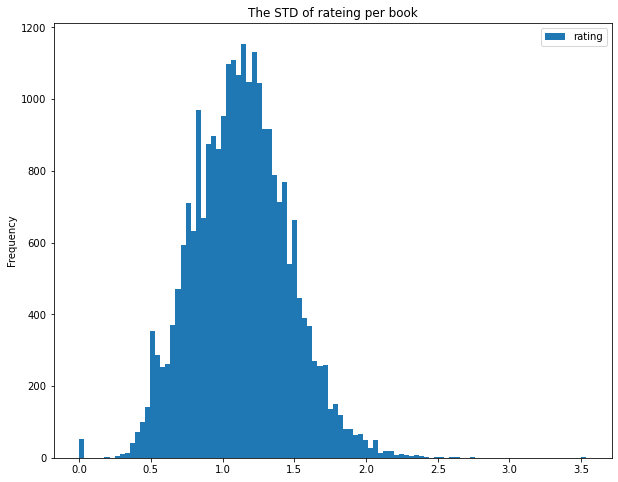

In [47]:
clean_books_rate.groupby(by='book_id').std()['rating'].plot(kind='hist', figsize=(10, 8),title='The STD of rateing per book',xlabel='Value',bins=100, legend=True)

## ML

In [53]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
# from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
df = clean_books_rate[['review_text_tokens','rating']]

In [49]:
df.sample(5)

,review_text_tokens,rating
review_id,,
a79624e135070e09ff1b18cce5fec11f,star book love good cinder main reason back fo...,5
3fd14edbab25715cf731415ed0bf1fa2,delightful child book subverts many fantasy st...,5
7cff6c4d69f8cb4935acd2d17c25bb2e,idea pulled boarding school ghost yay really get,2
669f585c2b6a389ab0271c54ce28a93f,good book love think world seems unrealistic f...,3
fb068336ec8d6f652aae5219d962f355,section pretty standard pretty average enterta...,3


In [50]:
mini_df  = df.sample(10000)

In [51]:
X = mini_df['review_text_tokens']
y = mini_df['rating']

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=404)

In [55]:
print('X Train set size: ', X_train.shape)
print('X Validation set size: ', X_val.shape)

X Train set size:  (8000,)
X Validation set size:  (2000,)


In [56]:
print('Y Train set size: ', y_train.shape)
print('Y Validation set size: ', y_val.shape)

Y Train set size:  (8000,)
Y Validation set size:  (2000,)


In [58]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

X_train_vectors = tfidf_vectorizer.fit_transform(X_train)
X_val_vectors = tfidf_vectorizer.transform(X_val)

In [59]:
print(X_train_vectors.shape)
print(X_val_vectors.shape)

(8000, 31152)
(2000, 31152)


## Logistic Regression

In [62]:
lr_model = LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_model.fit(X_train_vectors, y_train)

LogisticRegression(C=10, solver='liblinear')

In [63]:
y_predict = lr_model.predict(X_val_vectors)
y_prob = lr_model.predict_proba(X_val_vectors)[:,1]

In [65]:
print("test accuracy", str(numpy.mean(y_val == y_predict)))
print("-"*60)
print(classification_report(y_val,y_predict))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

test accuracy 0.4325
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.35      0.09      0.14        70
           1       0.53      0.16      0.24        57
           2       0.40      0.17      0.23       163
           3       0.34      0.33      0.33       422
           4       0.40      0.48      0.43       690
           5       0.53      0.59      0.56       598

    accuracy                           0.43      2000
   macro avg       0.43      0.30      0.32      2000
weighted avg       0.43      0.43      0.42      2000

------------------------------------------------------------
Confusion Matrix: [[  6   3   3  11  31  16]
 [  3   9   8  12  12  13]
 [  3   2  27  66  54  11]
 [  2   0  21 139 202  58]
 [  2   1   8 138 329 212]
 [  1   2   1  42 197 355]]


In [66]:
multiNB_model = MultinomialNB()
multiNB_model.fit(X_train_vectors, y_train)

MultinomialNB()

In [67]:
y_predict = multiNB_model.predict(X_val_vectors)
y_prob = multiNB_model.predict_proba(X_val_vectors)[:,1]

print("test accuracy", str(numpy.mean(y_val == y_predict)))
print("-"*60)
print(classification_report(y_val,y_predict))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

test accuracy 0.3975
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       163
           3       0.00      0.00      0.00       422
           4       0.36      0.92      0.52       690
           5       0.69      0.27      0.38       598

    accuracy                           0.40      2000
   macro avg       0.17      0.20      0.15      2000
weighted avg       0.33      0.40      0.29      2000

------------------------------------------------------------
Confusion Matrix: [[  0   0   0   0  63   7]
 [  0   0   0   0  53   4]
 [  0   0   0   1 161   1]
 [  0   0   0   0 415   7]
 [  0   0   0   0 636  54]
 [  0   0   0   0 439 159]]


In [68]:
sgd_model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=404)
sgd_model.fit(X_train_vectors, y_train)

SGDClassifier(alpha=0.001, random_state=404)

In [69]:
y_predict = sgd_model.predict(X_val_vectors)

print("test accuracy", str(numpy.mean(y_val == y_predict)))
print("-"*60)
print(classification_report(y_val,y_predict))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

test accuracy 0.445
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.35      0.10      0.16        70
           1       0.36      0.09      0.14        57
           2       0.37      0.09      0.14       163
           3       0.36      0.25      0.30       422
           4       0.44      0.42      0.43       690
           5       0.48      0.78      0.60       598

    accuracy                           0.45      2000
   macro avg       0.39      0.29      0.29      2000
weighted avg       0.42      0.45      0.41      2000

------------------------------------------------------------
Confusion Matrix: [[  7   3   4   9  17  30]
 [  3   5   4  12   9  24]
 [  4   3  14  61  50  31]
 [  2   1  13 106 190 110]
 [  4   2   3  85 289 307]
 [  0   0   0  20 109 469]]


## Xgboost는 나중에